<a href="https://colab.research.google.com/github/cykrr/ada/blob/master/knapsack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El problema de la mochila

El problema de la mochila, también conocido como Knapsack problem es un problema
de optimización combinatoria.

## Descripción del problema

Se define una mochila con una capacidad de $m$ unidades de peso. Además de una
secuencia de $n$ elementos, cada uno con un peso $p$ y un valor $v$. Se busca
una sub-secuencia de elementos de forma que se maximice la ganancia y no se
sobrepase el límite de $m$ unidades de peso.

**Entrada:** Capacidad de la mochila $m$ y una secuencia de elementos $E$

**Salida:** Ganancia máxima calculada

### Variaciones del problema

Existen varias formas de interpretar dicho problema, las más comunes y las que
se analizaran en el presente informe son las siguientes.

#### Problema de la mochila $0-1$

El problema de la mochila $0-1$ consiste en limitar el problema a elementos
enteros. Es decir, solo es posible tomar la totalidad del elemento dentro de la
mochila.

#### Problema de la mochila fraccional

A diferencia del problema $0-1$, en el problema fraccional se considera la
posibilidad de tomar una fracción del elemento para llenar el último hueco de
la mochila. _Hence the name_.

## Ejemplo del problema

Se toma como ejemplo una mochila de $15$ kg y la siguiente tabla de valores para
los elementos.

|$i$|$p \space \text {(kg)}$|$v \space \text {(\$)}$|
|---|---|---|
|0|1|1|
|1|2|1|
|2|2|2|
|3|4|10|
|4|12|4|22

La configuración óptima de elementos sería una sub-secuencia tal que se obvie el
último elemento, esto debido a que dicho elemento tiene un peso elevado y una
ganancia reducida. Si se tomara el último elemento, la máxima ganancia posible
sería de $\$7$. A diferencia de los $\$14$ obtenibles excluyendo dicho elemento.

## Estructura óptima del problema

Se considera la carga cuyo retorno es máximo con un peso de a lo sumo $P$ unidades.

Para el problema $0-1$ se considera la eliminación de un elemento $k$, se
requiere que la carga restante sea aquella de máximo retorno con un peso de a
lo sumo $P- \text{k.peso}$ para los $n-1$ elementos originales, obviando $k$.

Para el problema fraccional, se considera una fracción del último elemento $k$
con un peso $\text{k.peso}$. De la sub-secuencia óptima de elementos se elimina la fracción
de $k$, de forma que la carga restante debe ser de retorno máximo con un peso de
a lo más $\text{P - k.peso}$


Si bien ambos problemas presentan una sub-estructura óptima similar, **sólo es
posible resolver el problema fraccional con un enfoque greedy**.

## Descripción del algoritmo (greedy $0-1$)

Para resolver el problema $0-1$ con un enfoque greedy se ordena el arreglo de elementos de entrada por el ratio $\text{peso} \div \text{valor}$, luego se añaden los elementos en la mochila en dicho orden, en medida que el tamaño del objeto $k$ a añadir no sobrepase el peso disponible $P$. Es por este motivo que el resultado de dicha operación no es óptimo.

## Descripción del algoritmo (DP $0-1$)

Para el enfoque de programación dinámica (DP) se crea una tabla para resolver los sub-problemas por medio de **memoización**, cuyas dimensiones son $m+1 \times n+1$, siendo las filas cada peso posible desde $1$ hasta $m$. Mientras que las columnas corresponden a los $n$ elementos de entrada.

Posteriormente se recorre la matriz $M$ y se aplica la función de recursividad. La cual en base a la sección anterior y siendo $El$ el arreglo de elementos, se define como:

$$
M[i, p] = \left\{ 
\begin{array}{ll}
0  &\text{si} \space  i = 0 \space \lor \space p = 0 \\
M[i-1, p] &\text{si} \space  El[i].\text{peso} > p \\
max(M[i-1, p], M[i-1, p-El[i].\text{peso}] + v[i]) &\text{si} \space  El[i].\text{peso} \leq p \\
\end{array}
\right\}
$$

Se inicializan los problemas de tamaño 0 con un 0. Luego, si el peso del elemento $k$ es menor o igual al peso máximo $m$ se elige el máximo entre la última y la antepenúltima junto con el valor del elemento a añadir. Si el peso sobrepasa el límite, se utiliza la solución anterior.

Una vez resuelto el problema $M[n, m]$, se retorna dicho valor, en esta casilla se encuentra la ganancia máxima calculada.

## Incorrectitud de $0-1$ greedy

La principal diferencia entre el problema $0-1$ y el problema fraccional es, como se ha mencionado anterioremente, que no es posible tomar fracción del elemento en el problema $0-1$.

Existe la posibilidad de que un elemento  $k$ presente el ratio $\text{k.peso/k.valor}$ más elevado de la secuencia de elementos de entrada y que este **no forme parte de la sub-secuencia óptima de elementos**, esto es demostrable por medio de un contraejemplo.

Se considera una mochila de capacidad $m=30 \space kg$ y la siguiente tabla de
elementos de entrada

|$i$|$p \space \text {(kg)}$|$v \space \text {(\$)}$|
|---|---|---|
|0|5|50|
|1|20|140|
|2|10|60|


Al utilizar un enfoque greedy, se elegirían los dos primeros elementos en el
orden descendente por el ratio, correspondiente a los dos primeros elementos,
generando una ganancia de $\$190$. Sin embargo la solución óptima a este problema consiste en la elección de los dos últimos elementos, con una ganancia óptima de $\$200$.

## Correctitud de $0-1$ DP




**Hipotesis**: El algoritmo retorna una ganancia óptima correctamente de manera que la suma total de los valores de los elementos sea máxima.


Casos base: 

$P[0,j] \lor P[i,0]$ tamaño de mochila cero o ausencia de elementos, se resuelve un subproblema de tamaño cero con un valor cero.

El algoritmo resuelve los sub-problemas de la mochila de manera óptima de forma que la ganancia es máxima. Una vez son resueltos todos los subproblemas es posible solucionar el problema inicial $P(m,n)$

**Paso inductivo:** El algoritmo resuelve correctamente $P(m' < m, n)$ en base de los subproblemas de menor tamaño que ya han sido resueltos.

Gracias a la estructura óptima del problema se sabe que si $m'$ es correcto, $m$ también lo es.








In [ ]:
class Elemento:
  # constructor()
    def __init__(self, peso, valor):
        self.peso = peso
        self.valor = valor
        self.ratio = self.valor/self.peso
  # toString()
    def __str__(self):
        return f"El({self.peso}, {self.valor})"
    def __repr__(self):
        return self.__str__()
El = Elemento


In [ ]:
import numpy as np
def dp_knap(m, elementos, count = False, v = False):
  n = len(elementos);

  if count: cc = 0;

# Matriz de memoización
  M = np.zeros(shape=(n+1, m+1))

# Se recorren los subproblemas
  for i in range(n+1):
    if v: print(f"Se revisa el {i} elemento")
    if v: print("Ganancias maximas: ")
    for j in range(m+1):
      if count: cc+=1;


    # Se definen los casos base
      if i == 0 or j == 0:
        #  if v: print("Caso base")
        M[i][j] = 0 
  
    # Si el peso es menor al tope del subproblema
      elif elementos[i-1].peso <= j:
        #  if v: print(f"El elemento {i-1} cabe en la mochila")
        M[i][j] = max(
            elementos[i-1].valor + M[i-1][j - elementos[i-1].peso],
            M[i-1][j]
        )
    # Si se excede, tomar el anterior
      else:
        #  if v: print(f"El elemento {i-1} no cabe, no se guarda en la mochila")
        M[i][j] = M[i-1][j]

      if j % 10 == 0 and j != 0 and v:  print()
      if v: print(f"{round(M[i][j]):03d} ", end = "")
      if j == m and v: print()
  # print(M)

  if count:
    return M[n][m], cc
  else:
    return M[n][m]


e = Elemento #xd
v = dp_knap(5, [e(1,60), e(2, 100), e(3, 120)], count = True, v = True);
print(v)


Se revisa el 0 elemento
Ganancias maximas: 
000 000 000 000 000 000 
Se revisa el 1 elemento
Ganancias maximas: 
000 060 060 060 060 060 
Se revisa el 2 elemento
Ganancias maximas: 
000 060 100 160 160 160 
Se revisa el 3 elemento
Ganancias maximas: 
000 060 100 160 180 220 
(220.0, 24)


In [ ]:
def greedy_knap(m, elementos, count = False, v = False):
  # Se ordena el arreglo
    if v: print(f"Se ordena el arreglo {elementos} -> ", end = "") 
    elementos = sorted(elementos, 
                       key= lambda x: x.ratio,
                       reverse= True);
    if v: print(f"{elementos}")                  
  # Valor maximo de ganancia
    valor = .0

    if count: cc = 0

  # Para cada elemento
    for elemento in elementos:
        if count: cc += 1
        if v: print(f"Para el elemento {elemento}")
      # Si su peso es menor al espacio disponible
        if (elemento.peso <= m):
            if v: print(f"Cabe en la mochila, se reduce el peso en {elemento.peso}" + 
                  f" y se aumenta la ganancia en {elemento.valor}");

        # reducir el espacio disponible y contabilizar la ganancia
            m -= elemento.peso;
            valor += elemento.valor
        else: print(f"El elemento de peso {elemento.peso} no cabe en la mochila :(")
            
    if count: return valor, cc
    return valor

e = Elemento

v = greedy_knap(5, [e(1,60), e(2, 100), e(3, 120)], count = True, v = True);
print(v)


Se ordena el arreglo [El(1, 60), El(2, 100), El(3, 120)] -> [El(1, 60), El(2, 100), El(3, 120)]
Para el elemento El(1, 60)
Cabe en la mochila, se reduce el peso en 1 y se aumenta la ganancia en 60
Para el elemento El(2, 100)
Cabe en la mochila, se reduce el peso en 2 y se aumenta la ganancia en 100
Para el elemento El(3, 120)
El elemento de peso 3 no cabe en la mochila :(
(160.0, 3)


## Tiempo de ejecución

### Greedy 0-1

**Teorema**: El algoritmo greedy 0-1 tiene un tiempo de ejecución $O(n \cdot
log (n))$

**Prueba del teorema**: 

El algoritmo ordena los elementos con un costo $O(n \cdot log(n))$ (QuickSort),
por otro lado, obtener la solución final del problema tiene un costo $O(n)$. Por
lo que la cota asintótica del algoritmo 0-1 greedy es $O(n \cdot log (n))$.


### DP 0-1

**Teorema**: El algoritmo DP 0-1 tiene un tiempo de ejecución $O(nm)$

**Prueba del teorema**:

Es sabido que el tiempo de ejecución de un algoritmo de
programación está directamente relacionado con la resolución de subproblemas y el tiempo que toma resolver cada uno. Al utilizar memoización para resolver el
problema actual en base a los subproblemas se sabe que el costo de resolver un (sub-problema) es constante $O(1)$ y que cada subproblema se resuelve una única vez. De esto se obtiene que 

$$
T(n, m) = O(1) \cdot C(n, m)
$$

Siendo $C(n, m)$ la cantidad de subproblemas a resolver.

Para cada elemento en el rango $1..n$ el peso puede variar en el rango $1..m$, de forma que

$$
C(n,m)=nm
$$

Por lo que $T(n, m) = O(nm)$.

## Experimentos

### Comparación de los tiempos de ejecución greedy y DP en 0-1



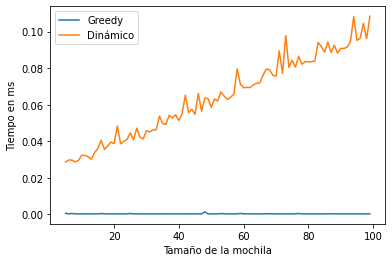

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
  
x=[]; y=[]
y1=[]
for n in range(5, 100):

  peso = random.sample(range(1, 100), 50)
  valor = random.sample(range(1, 100), 50)

  elementos = []
  for i in range(50):
    elementos.append(Elemento(peso[i], valor[i]))

  
  w = 50 + n

  t1 = repeat(setup="from __main__ import greedy_knap, Elemento as El", stmt=f"greedy_knap({w}, {elementos})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import dp_knap, Elemento as El", stmt=f"dp_knap({w}, {elementos})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Greedy", "Dinámico"])

plt.xlabel('Tamaño de la mochila')
plt.ylabel('Tiempo en ms')
plt.show()

Se observa que el algoritmo dinámico es mucho más lento que el algoritmo greedy. Esto concuerda con en analisis teórico, puesto que $O(nm)$ > $O(n log(n))$ en el caso de que $m$ > $log(n)$, esto se cumple la mayoría de las veces puesto que una mochila almacenará múltiples elementos en la mayoría de casos.

### Cantidad de iteraciones / subproblemas



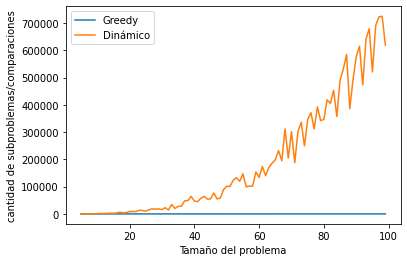

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt


  
x=[]; y1=[]
y2=[]
for n in range(5, 100):
  w, val, weight = knapsack_instance_generator(n);
  els = []
  for i in range(len(val)):
    els.append(Elemento(weight[i], val[i]))
  gain, count = dp_knap(w, els, count = True)
  y1.append(count);
  gain, count = greedy_knap(w, els, count = True)
  y2.append(count);
  x.append(n)



plt.plot(x, y2)
plt.plot(x, y1)
plt.legend(["Greedy", "Dinámico"])

plt.xlabel('Tamaño del problema')
plt.ylabel('cantidad de subproblemas/comparaciones')
plt.show()

Se observa que, el algoritmo es mucho más eficiente en términos de instrucciones/operaciones, si bien el algoritmo entrega una solución óptima, lo hace en un tiempo elevado tomando como referencia la cantidad de operaciones del algoritmo greedy. Además, el algoritmo greedy entrega un 50% de optimalidad de ganancia, haciendo a este mismo una opción tentativa en el caso de que el tiempo sea una limitante.

### Comparación de la ganancia máxima obtenida de cada algoritmo

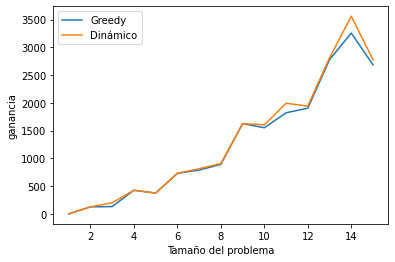

In [ ]:
x=[]; y1=[]
y2=[]
for n in range(1, 16):
  w, val, weight = knapsack_instance_generator(n);
  els = []
  for i in range(len(val)):
    els.append(Elemento(weight[i], val[i]))
  gain, count = dp_knap(w, els, count = True)
  y1.append(gain);
  gain, count = greedy_knap(w, els, count = True)
  y2.append(gain);
  x.append(n)



plt.plot(x, y2)
plt.plot(x, y1)
plt.legend(["Greedy", "Dinámico"])

plt.xlabel('Tamaño del problema')
plt.ylabel('ganancia')
plt.show()

Se observa que para conjuntos aleatorios de elementos, muchas veces ambos algoritmos retornarán el mismo valor de ganancia, mientras que en el resto de veces, el algoritmo greedy falla a la hora de entregar un resultado óptimo. Asumo que este comportamiento es debido a la naturaleza aleatoria del set de datos.